In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [31]:
# Load the cleaned data
data = pd.read_csv('car_data_good.csv')
data.head()

,year,price,mileage,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,model_ X5,model_ X6,model_ X7,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,2014,11200,67068,2.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2018,27000,14827,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2016,16000,62794,3.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2017,12750,26676,1.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,14500,39554,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
data.shape

(10664, 31)

In [32]:
# Split data into x and y variables
y = data['price']
type(y)

pandas.core.series.Series

In [35]:
x = data.drop(columns=['price'])
x.head()

,year,mileage,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,...,model_ X5,model_ X6,model_ X7,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,2014,67068,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2018,14827,2.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2016,62794,3.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2017,26676,1.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,39554,3.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [38]:
# Create train and test sets
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=69)

In [62]:
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((7998, 30), (7998,), (2666, 30), (2666,))

In [56]:
# Decision tree with depth of 3
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=3)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [60]:
from sklearn.metrics import mean_absolute_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE: {} R2 score: {}'.format(mae,r2))

MAE: 4103.277762564925 R2 score: 0.7518764458221681


In [69]:
# Decision tree with depth of 5
from sklearn import tree
from sklearn.metrics import mean_absolute_error,r2_score
clf = tree.DecisionTreeRegressor(max_depth=5)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE: {} R2 score: {}'.format(mae,r2))

MAE: 3335.681518980849 R2 score: 0.8309671471997829


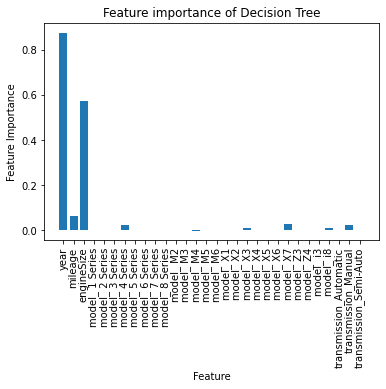

In [90]:
# Create a feature importance plot using permutation importance
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
features = list(x)
result = permutation_importance(clf,x_test,y_test,
                                n_repeats=10,
                                random_state=0)
importance = result.importances_mean
plt.bar(features,importance)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature importance of Decision Tree')
plt.show()

In [68]:
# Decision tree with depth of 10
from sklearn import tree
from sklearn.metrics import mean_absolute_error,r2_score
clf = tree.DecisionTreeRegressor(max_depth=10)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE: {} R2 score: {}'.format(mae,r2))

MAE: 2462.7968635500333 R2 score: 0.8935188012164026


In [66]:
# Random forest
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE: {} R2 score: {}'.format(mae,r2))

MAE: 4661.168783573251 R2 score: 0.678754059350517


In [82]:
regr = RandomForestRegressor(max_depth=5, random_state=0)
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE: {} R2 score: {}'.format(mae,r2))

MAE: 3146.002714218875 R2 score: 0.847815688676689


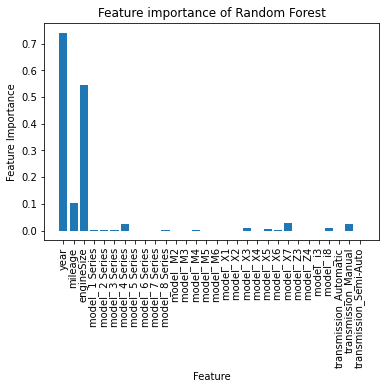

In [88]:
# Create a feature importance plot using permutation importance
features = list(x)
result = permutation_importance(regr,x_test,y_test,
                                n_repeats=10,
                                random_state=0)
importance = result.importances_mean
plt.bar(features,importance)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature importance of Random Forest')
plt.show()

In [86]:
# Create a gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()
gbm.fit(x_train,y_train)
y_pred= gbm.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print('MAE: {} R2 score: {}'.format(mae,r2))

MAE: 2211.0064134495383 R2 score: 0.9190448972104723


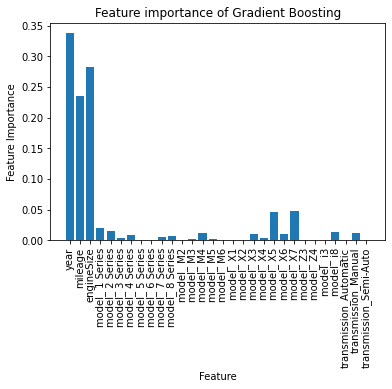

In [89]:
# Create a feature importance plot using permutation importance
features = list(x)
result = permutation_importance(gbm,x_test,y_test,
                                n_repeats=10,
                                random_state=0)
importance = result.importances_mean
plt.bar(features,importance)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature importance of Gradient Boosting')
plt.show()